<a href="https://colab.research.google.com/github/sekoukeita/Exploratory-Data-Analysis-and-Visualisation-on-US-Road-Accidents/blob/master/Exploratory_Data_Analysis_of_Accidents_in_US_and_in_Cleveland_OHIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Roads Accidents in US and in the City of Cleveland Ohio.

In order to do this analysis, I get a public data from [Kaggle](https://www.kaggle.com/). This [data](https://www.kaggle.com/sobhanmoosavi/us-accidents) is a compilation of about 3 millions roads accidents records gathered from February 2016 to December 2019, from the 49 contiguous states of United States (Alaska and Haiti are not included).
Using Exploratory data analysis (data manipulation and visualization), I will first try to respond to some questions about accidents in the whole United states and then focus on my home city, Cleveland Ohio, to go a little deeper in the analysis.

# Part 1 : Accidents in the United States

In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

In [284]:
# This cell has been automatically added by google colab to connect the  notebook with the google Drive account where the data is stored.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## What are the top 10 States in term of accidents

In [285]:
# Load the data.
df_accidents = pd.read_csv('/content/drive/My Drive/Data Science Projects/Accident_Analysis/US_Accidents_Dec19.csv')
df_accidents.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [286]:
# A serie with states abbr as labels and numbers of accidents as values.
accidents_per_state = df_accidents['State'].value_counts().sort_values(ascending=False)
accidents_per_state.head()

CA    663204
TX    298062
FL    223746
SC    146689
NC    142460
Name: State, dtype: int64

In [0]:
# Dictionary of US states and territories copied from internet to map the States' abbreviations with to get the state full names.
states_terrirories = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [0]:
# Create the DataFrame accidents per state.
df_accidents_per_state = pd.DataFrame({'State': accidents_per_state.index.map(states_terrirories), 
                                       'Abbr': accidents_per_state.index, 'Number Of Accidents': accidents_per_state.values})
# Add the column Percentage to the DataFrame.
df_accidents_per_state['Percentage'] = df_accidents_per_state['Number Of Accidents'].\
                                        apply(lambda x: '{:05.2f}'.format(x/len(df_accidents['ID'])*100))

In [289]:
# Display the top 10 States in term of accidents.
rank = np.arange(1,11)
df_top10_states = df_accidents_per_state.head(10).set_index(rank)
df_top10_states

,State,Abbr,Number Of Accidents,Percentage
1,California,CA,663204,22.30
2,Texas,TX,298062,10.02
3,Florida,FL,223746,07.52
4,South Carolina,SC,146689,04.93
5,North Carolina,NC,142460,04.79
6,New York,NY,137799,04.63
7,Pennsylvania,PA,90395,03.04
8,Michigan,MI,88694,02.98
9,Illinois,IL,86390,02.90
10,Georgia,GA,83620,02.81


In [290]:
rate_5_states = df_top10_states.head(5)['Number Of Accidents'].sum()/len(df_accidents['ID'])*100
print('Comment: Almost 50 % ({:05.2f} %) of all the US accidents occur in the top 5 states.'.format(rate_5_states))

Comment: Almost 50 % (49.56 %) of all the US accidents occur in the top 5 states.


## What are the top 10 cities in term of accidents?

In [0]:
# We can't use value_counts() for city like we did in the case of states.
# Cities name are not unique over the United States but seem to be unique by state.
# Let's use groupby state and city then create the DataFrame accidents per city.
df_city = df_accidents[['ID','State','City']]

In [292]:
# The groupby DataFrame
df_city = df_city.groupby(['State','City']).count()
df_city

ID
State City            
AL    Abbeville      6
      Adamsville     9
      Addison        4
      Alabaster    149
      Albertville   21
...                ...
WY    Torrington     4
      Wamsutter     24
      Wheatland     10
      Wilson         2
      Worland        1

[16884 rows x 1 columns]

In [0]:
# The method index.get_level_values(level) allows to get a serie from a multi-index according to the given level.
# Create the DataFrame accidents per city
df_accidents_per_city = pd.DataFrame({'City': df_city.index.get_level_values(1),'State': df_city.index.get_level_values(0).map(states_terrirories),
                                       'Number Of Accidents': df_city['ID']}).reset_index(drop=True)
df_accidents_per_city['Percentage'] = df_accidents_per_city['Number Of Accidents'].\
                                        apply(lambda x: '{:05.2f}'.format(x/len(df_accidents['ID'])*100))

In [294]:
df_top10_cities = df_accidents_per_city.sort_values(by='Number Of Accidents',ascending=False).head(10).set_index(rank)
df_top10_cities

,City,State,Number Of Accidents,Percentage
1,Houston,Texas,93245,03.13
2,Charlotte,North Carolina,67917,02.28
3,Los Angeles,California,65851,02.21
4,Austin,Texas,58553,01.97
5,Dallas,Texas,57823,01.94
6,Raleigh,North Carolina,39623,01.33
7,Atlanta,Georgia,37576,01.26
8,Miami,Florida,31097,01.05
9,Oklahoma City,Oklahoma,30787,01.04
10,Baton Rouge,Louisiana,30232,01.02


In [295]:
houston = df_top10_cities.iloc[0,2] # first row: index = 0 , 3rd column: column = 2
pennsylvania = df_top10_states.loc[7,'Number Of Accidents'] # index label = 7, column label= 'Number of Accidents'

print('Comment: The top 1 city, Houston, has more accidents ({:,}) than the entire Pennsylvania state ({:,})\
 which is ranked 7th in the top 10 states.'.format(houston, pennsylvania))

Comment: The top 1 city, Houston, has more accidents (93,245) than the entire Pennsylvania state (90,395) which is ranked 7th in the top 10 states.


## Visualization of the top 10 States and Cities

Text(0, 0.5, 'Number of Accidents')

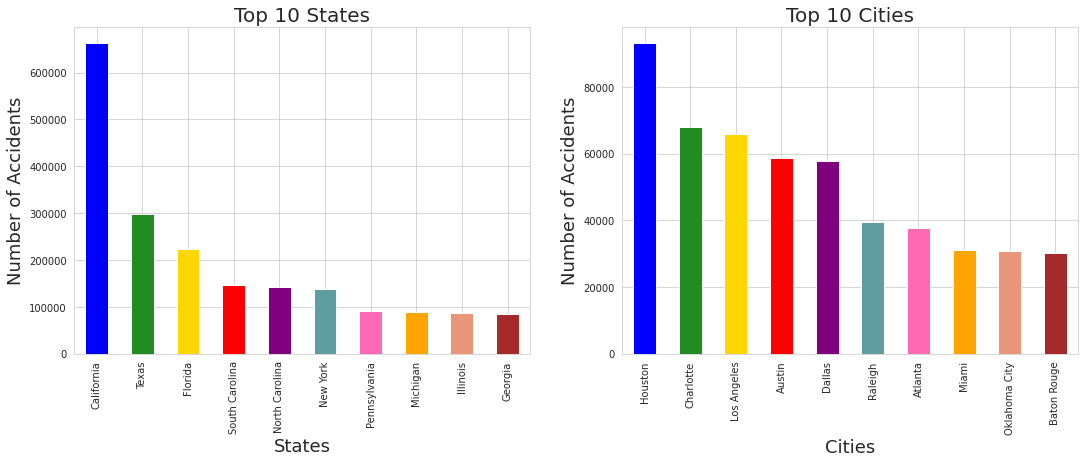

In [296]:
# Visualization of the 10 states and cities where accidents happen the most using pandas bult-in visualization

df_state = df_top10_states.set_index('State')
df_city = df_top10_cities.set_index('City')

fig,ax = plt.subplots(1,2,figsize=(18,6))
color = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')

df_state['Number Of Accidents'].plot.bar(ax=ax[0],color=color)
ax[0].set_title("Top 10 States",size=20)
ax[0].set_xlabel('States',size=18)
ax[0].set_ylabel('Number of Accidents',size=18)

df_city['Number Of Accidents'].plot(kind='bar',ax=ax[1],color=color)
ax[1].set_title("Top 10 Cities",size=20)
ax[1].set_xlabel('Cities',size=18)
ax[1].set_ylabel('Number of Accidents',size=18)

In [297]:
print('Comment: Although Texas is not the top 1 state in term of accidents, it has 3 cities (Houston, Austin and Dallas) in the top 5 cities.')

Comment: Although Texas is not the top 1 state in term of accidents, it has 3 cities (Houston, Austin and Dallas) in the top 5 cities.


## Interactive Visualization of Accidents Distribution over the entire United States

In [0]:
# Defining data variable
text = df_accidents_per_state.apply(lambda x: x['State'] + ': ' + str(x['Percentage']) + ' %',axis=1)
data = dict(type = 'choropleth',
           locations = df_accidents_per_state['Abbr'],
           locationmode = 'USA-states',
            reversescale = True,
           text = text,
           z = df_accidents_per_state['Number Of Accidents'], # the color vary according to z value.
           colorbar = {'title':'Number of Accidents'}
           )

# Defining layout variable
layout = dict(geo = dict(scope='usa', showlakes=False, lakecolor='rgb(85,173,240)'),
             title = 'Accidents from February 2016 to December 2019 Distribution in the United States.'
             )

In [299]:
# Displaying the interactive choropleth
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

## How accidents are distributed in term of severity and their occurrence moment (Day or Night)

Text(0, 0.5, 'Number of Accidents')

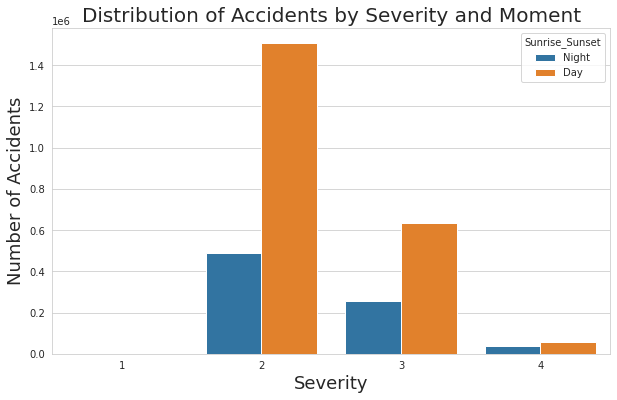

In [300]:
# Distribution of accidents according to their severity and when (Day/Night) they occur using Seaborn visualization.
plt.figure(figsize=(10,6))

sns.countplot(data=df_accidents,x='Severity', hue='Sunrise_Sunset',)
plt.title('Distribution of Accidents by Severity and Moment', size= 20)
plt.xlabel('Severity', size=18)
plt.ylabel('Number of Accidents', size=18)

In [301]:
print('Comment:The large majority of accidents has from the category 2 on a scale of 4 in term of severity \
and no matter its severity, an accident likely occurs during the day than at night.')

Comment:The large majority of accidents has from the category 2 on a scale of 4 in term of severity and no matter its severity, an accident likely occurs during the day than at night.


# Part 2: Accidents in Cleveland Ohio

## How Cleveland Accidents are distributed per year, month, day and hour

Since the analysis will be done on days, months and hours, we will focus on accidents that occurred during the full years 2017 and 2018 from January 1rst,2017 through December 31rst, 2018.

In [0]:
from datetime import datetime

In [0]:
# Let's convert the Start and End time columns that are in string format into date format and use them to get only accidents occurred
# between 1/1/2017 and 12/31/2018 and filter on State and City to get only accidents for the city of Cleveland.

df_accidents['Start_Time'] = pd.to_datetime(df_accidents['Start_Time'])
df_accidents['End_Time'] = pd.to_datetime(df_accidents['End_Time'])

start = datetime.strptime('1/1/2017','%m/%d/%Y')
end = datetime.strptime('1/1/2019','%m/%d/%Y')

df_accidents_cleveland = df_accidents[(df_accidents['State']=='OH') & (df_accidents['City']=='Cleveland') & \
                                      (df_accidents['Start_Time']>=start) & (df_accidents['End_Time']<end)]


In [304]:
df_accidents_cleveland.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
222893,A-222895,MapQuest,201.0,3,2017-01-05 07:37:43,2017-01-05 08:07:16,41.421810,-81.734482,NaN,NaN,0.01,Accident on I-480 Eastbound at Exit 15 Ridge Rd.,NaN,Ridge Rd,R,Cleveland,Cuyahoga,OH,44144,US,US/Eastern,KCLE,2017-01-05 07:38:00,19.0,6.1,65.0,29.99,2.0,WSW,12.7,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
222923,A-222925,MapQuest,241.0,3,2017-01-05 11:38:10,2017-01-05 12:07:40,41.371895,-81.820786,NaN,NaN,2.17,Right lane blocked due to accident on I-71 Sou...,NaN,I-71 N,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2017-01-05 11:30:00,21.0,10.6,71.0,29.98,1.8,SW,9.2,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
223028,A-223030,MapQuest,201.0,3,2017-01-06 17:25:43,2017-01-06 18:10:13,41.421810,-81.734482,NaN,NaN,1.27,2 right lane blocked due to accident on I-480 ...,NaN,Ridge Rd,R,Cleveland,Cuyahoga,OH,44144,US,US/Eastern,KCLE,2017-01-06 17:51:00,12.9,1.6,62.0,30.33,10.0,SW,8.1,0.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
223043,A-223045,MapQuest,201.0,3,2017-01-09 07:04:58,2017-01-09 07:34:38,41.411377,-81.615723,NaN,NaN,1.65,Accident on I-480 Eastbound between Exit 20A-B...,NaN,I-480 E,R,Cleveland,Cuyahoga,OH,44125,US,US/Eastern,KBKL,2017-01-09 06:53:00,16.0,1.7,62.0,30.53,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
223077,A-223079,MapQuest,201.0,3,2017-01-10 06:06:32,2017-01-10 06:36:15,41.371895,-81.820786,NaN,NaN,0.01,Accident on I-71 Southbound near Exit 235 Bagl...,NaN,I-71 N,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2017-01-10 05:51:00,33.1,23.0,61.0,30.16,9.0,South,15.0,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [0]:
# Let's add some new columns that will help us in hours, week days, months, and years analysis.

df_accidents_cleveland['Hour'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.hour)
df_accidents_cleveland['Weekday'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.dayofweek)
df_accidents_cleveland['Month'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.month)
df_accidents_cleveland['Year'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.year)

In [306]:
df_accidents_cleveland.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,Month,Year
222893,A-222895,MapQuest,201.0,3,2017-01-05 07:37:43,2017-01-05 08:07:16,41.421810,-81.734482,NaN,NaN,0.01,Accident on I-480 Eastbound at Exit 15 Ridge Rd.,NaN,Ridge Rd,R,Cleveland,Cuyahoga,OH,44144,US,US/Eastern,KCLE,2017-01-05 07:38:00,19.0,6.1,65.0,29.99,2.0,WSW,12.7,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,7,3,1,2017
222923,A-222925,MapQuest,241.0,3,2017-01-05 11:38:10,2017-01-05 12:07:40,41.371895,-81.820786,NaN,NaN,2.17,Right lane blocked due to accident on I-71 Sou...,NaN,I-71 N,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2017-01-05 11:30:00,21.0,10.6,71.0,29.98,1.8,SW,9.2,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,11,3,1,2017
223028,A-223030,MapQuest,201.0,3,2017-01-06 17:25:43,2017-01-06 18:10:13,41.421810,-81.734482,NaN,NaN,1.27,2 right lane blocked due to accident on I-480 ...,NaN,Ridge Rd,R,Cleveland,Cuyahoga,OH,44144,US,US/Eastern,KCLE,2017-01-06 17:51:00,12.9,1.6,62.0,30.33,10.0,SW,8.1,0.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,17,4,1,2017
223043,A-223045,MapQuest,201.0,3,2017-01-09 07:04:58,2017-01-09 07:34:38,41.411377,-81.615723,NaN,NaN,1.65,Accident on I-480 Eastbound between Exit 20A-B...,NaN,I-480 E,R,Cleveland,Cuyahoga,OH,44125,US,US/Eastern,KBKL,2017-01-09 06:53:00,16.0,1.7,62.0,30.53,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,7,0,1,2017
223077,A-223079,MapQuest,201.0,3,2017-01-10 06:06:32,2017-01-10 06:36:15,41.371895,-81.820786,NaN,NaN,0.01,Accident on I-71 Southbound near Exit 235 Bagl...,NaN,I-71 N,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2017-01-10 05:51:00,33.1,23.0,61.0,30.16,9.0,South,15.0,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,6,1,1,2017


### Accidents per Year

Text(0, 0.5, 'Number of Accidents')

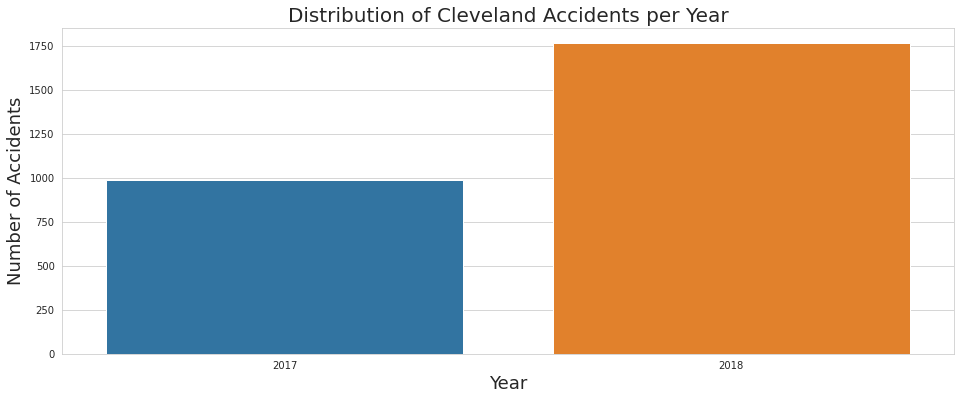

In [307]:
plt.figure(figsize=(16,6))

sns.countplot(data=df_accidents_cleveland,x='Year')
plt.title('Distribution of Cleveland Accidents per Year', size= 20)
plt.xlabel('Year', size=18)
plt.ylabel('Number of Accidents', size=18)

In [124]:
print('Comment:The number of accidents has almost doubled from 2017 to 2018')

Comment:The number of accidents has almost doubled from 2017 to 2018


### Accidents per Month

Text(0, 0.5, 'Number of Accidents')

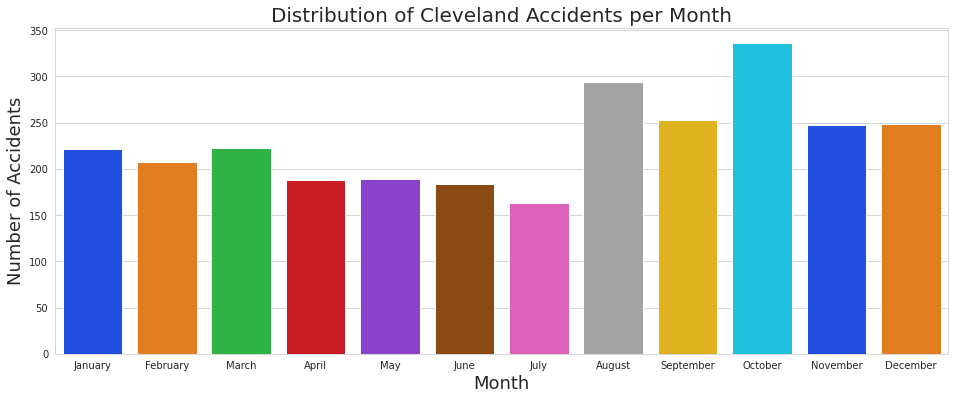

In [308]:
plt.figure(figsize=(16,6))

sns.countplot(data=df_accidents_cleveland,x='Month',palette='bright')
plt.title('Distribution of Cleveland Accidents per Month', size= 20)
plt.xlabel('Month', size=18)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.ylabel('Number of Accidents', size=18)

In [311]:
print('Comment: Most accidents happen in October, followed by August. July is the month with less accidents.')

Comment: Most accidents happen in October, followed by August. July is the month with less accidents.


In [0]:
# Heatmap of accidents per month
matrix_month = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Month',aggfunc='count')
matrix_month.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [313]:
matrix_month

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2017,71,71,67,40,57,37,35,152,136,122,77,125
2018,151,136,156,148,132,147,128,142,117,214,170,124


Text(846.5999999999998, 0.5, 'Year')

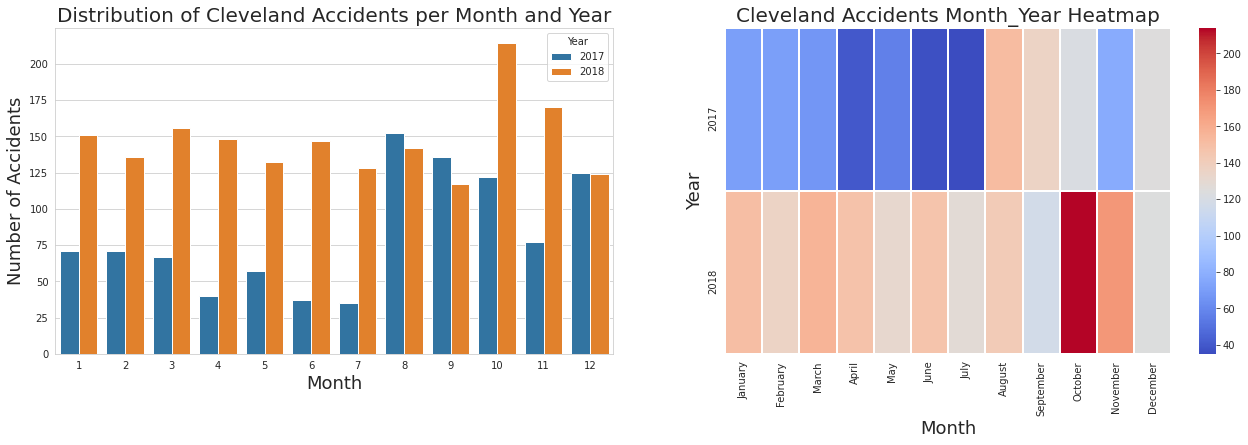

In [314]:
# Distribution of accidents over years and months using Seaborn visualizations.
fig,ax = plt.subplots(1,2,figsize=(22,6))

sns.countplot(data=df_accidents_cleveland,x='Month',hue='Year',ax=ax[0])
ax[0].set_title('Distribution of Cleveland Accidents per Month and Year', size= 20)
ax[0].set_xlabel('Month', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)

sns.heatmap(matrix_month,cmap='coolwarm',linewidth=1,linecolor='white',ax=ax[1])
ax[1].set_title('Cleveland Accidents Month_Year Heatmap', size= 20)
ax[1].set_xlabel('Month', size=18)
ax[1].set_ylabel('Year', size=18)

In [315]:
print('Comment: Except the months of August, September and December, all the other months registered more accidents in 2018 than in 2017.\nThe month of october 2018 has the highest number of accidents.')

Comment: Except the months of August, September and December, all the other months registered more accidents in 2018 than in 2017.
The month of october 2018 has the highest number of accidents.


### Accidents per Day

Text(0, 0.5, 'Number of Accidents')

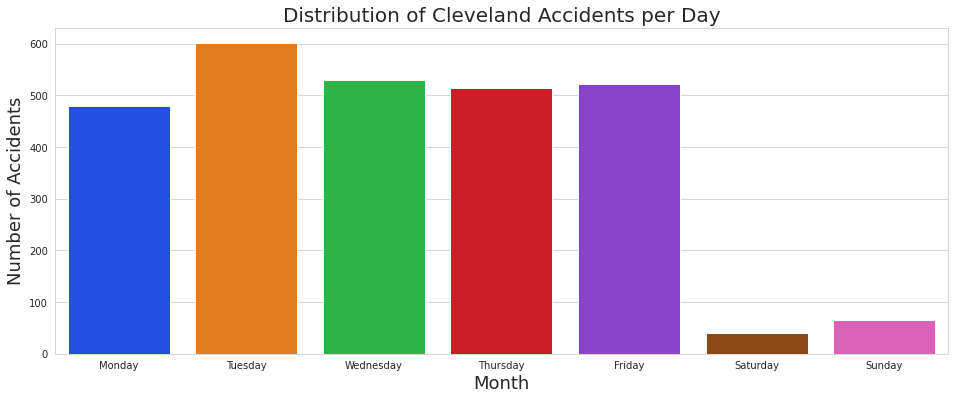

In [316]:
plt.figure(figsize=(16,6))

sns.countplot(data=df_accidents_cleveland,x='Weekday',palette='bright')
plt.title('Distribution of Cleveland Accidents per Day', size= 20)
plt.xlabel('Month', size=18)
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Number of Accidents', size=18)

In [317]:
print('Comment: Accidents occur less in weekend (Saturdays and sundays). They mostly happen on Tuesdays.')

Comment: Accidents occur less in weekend (Saturdays and sundays). They mostly happen on Tuesdays.


In [0]:
# Heatmap of accidents per day
matrix_day = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Weekday',aggfunc='count')
matrix_day.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [319]:
matrix_day

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2017,162,216,174,216,187,16,19
2018,318,385,356,299,335,25,47


Text(846.5999999999998, 0.5, 'Year')

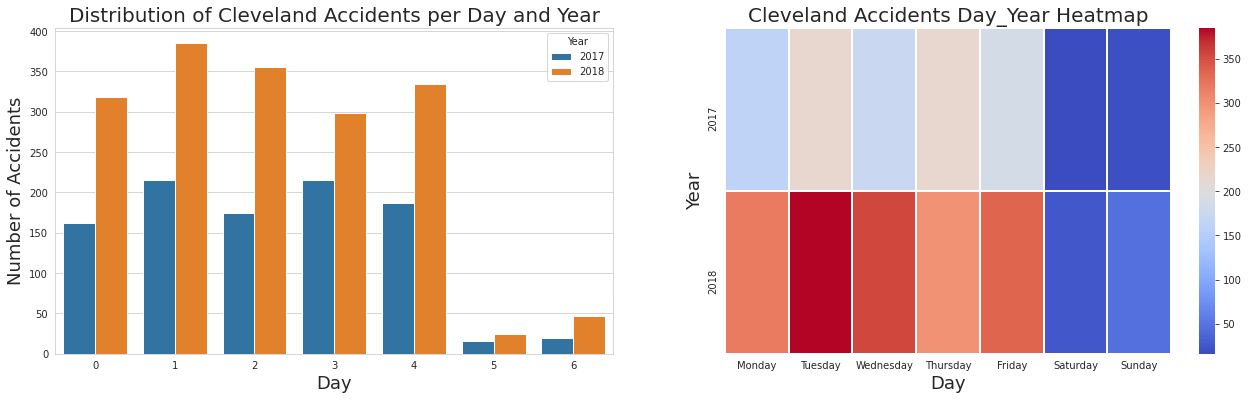

In [321]:
# Distribution of accidents over years and day using Seaborn visualization.
fig,ax = plt.subplots(1,2,figsize=(22,6))

sns.countplot(data=df_accidents_cleveland,x='Weekday',hue='Year',ax=ax[0])
ax[0].set_title('Distribution of Cleveland Accidents per Day and Year', size= 20)
ax[0].set_xlabel('Day', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)

sns.heatmap(matrix_day,cmap='coolwarm',linewidth=1,linecolor='white',ax=ax[1])
ax[1].set_title('Cleveland Accidents Day_Year Heatmap', size= 20)
ax[1].set_xlabel('Day', size=18)
ax[1].set_ylabel('Year', size=18)

In [322]:
print('Comment: No matter the year, it happened more accidents in 2018 than 2017 and weekends register less accidents. 2018 Tuedays registered the most accidents.')

Comment: No matter the year, it happened more accidents in 2018 than 2017 and weekends register less accidents. 2018 Tuedays registered the most accidents.


### Accidents per Hour

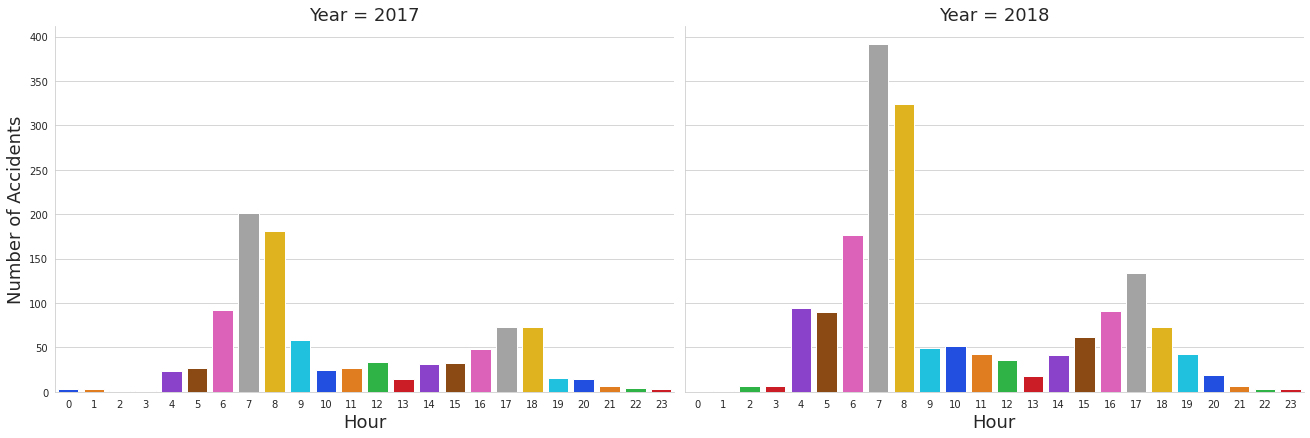

In [323]:
# Using seaborn catplot to display to charts side by side like the facegrid
g= sns.catplot(data=df_accidents_cleveland,x='Hour',col='Year',kind='count',height=6, aspect=1.5,palette='bright')
g.set_titles(size=18)
g.set_xlabels(size=18)
g.set_ylabels('Number of Accidents',size=18)

In [324]:
print('The 2 years show the same trends: Accidents mostly happen in the morning and occur around 7 and 8 am.\nSince we already saw that accidents mostly occur on week days,\
we can conclude that accident happen during morning rush hours when people are on they way to work.')

The 2 years show the same trends: Accidents mostly happen in the morning and occur around 7 and 8 am.
Since we already saw that accidents mostly occur on week days,we can conclude that accident happen during morning rush hours when people are on they way to work.


In [0]:
# Heatmap of accidents per Hour
matrix_hour = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Hour',aggfunc='count')

In [326]:
matrix_hour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,,,,
2017,3.0,3.0,1.0,1.0,23.0,27.0,92.0,201.0,181.0,58.0,24.0,27.0,34.0,14.0,31.0,33.0,48.0,73.0,73.0,15.0,14.0,7.0,4.0,3.0
2018,NaN,1.0,7.0,6.0,94.0,90.0,177.0,392.0,324.0,49.0,52.0,43.0,36.0,18.0,41.0,62.0,91.0,134.0,73.0,43.0,19.0,7.0,3.0,3.0


Text(846.5999999999998, 0.5, 'Year')

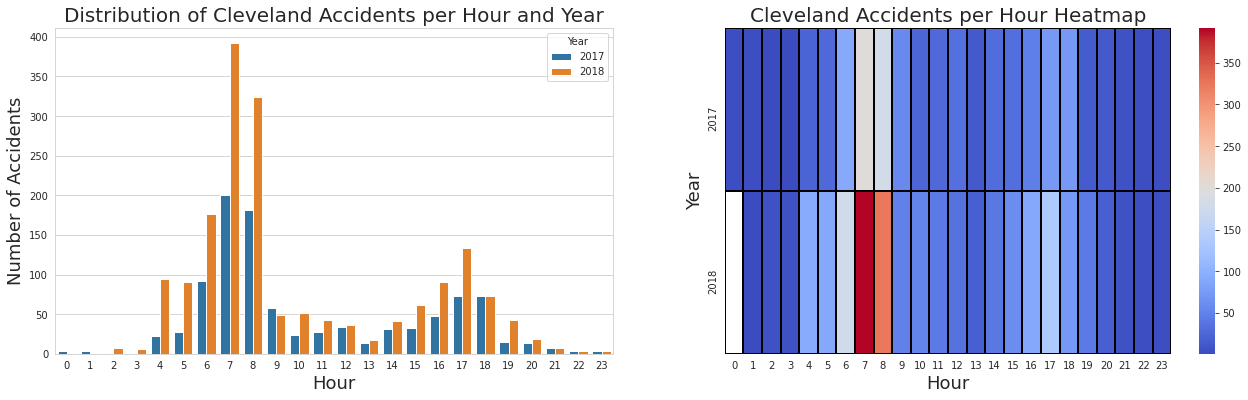

In [327]:
# Distribution of accidents per Hour using Seaborn visualization.
fig,ax = plt.subplots(1,2,figsize=(22,6))

sns.countplot(data=df_accidents_cleveland,x='Hour',hue='Year',ax=ax[0])
ax[0].set_title('Distribution of Cleveland Accidents per Hour and Year', size= 20)
ax[0].set_xlabel('Hour', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)

sns.heatmap(matrix_hour,cmap='coolwarm',linewidth=1,linecolor='black',ax=ax[1])
ax[1].set_title('Cleveland Accidents per Hour Heatmap', size= 20)
ax[1].set_xlabel('Hour', size=18)
ax[1].set_ylabel('Year', size=18)

In [329]:
print('Comment: The heatmap shows clearly that the accidents happen mostly around 7 and 8 am.')

Comment: The heatmap shows clearly that the accidents happen mostly around 7 and 8 am.
